In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
dataset = pd.read_csv('data/iris.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
dataset.shape

(150, 5)

In [8]:
dataset.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Your Task


Plot sepal width vs. sepal length with colors corresponding to the species.
Train a k-Means model for 3 clusters and plot the results.
Train a Hierarchical Clustering model for 3 clusters and plot the results.
Do again the first three steps now with petal width vs. petal length.
Visually, which 2D plane seems to be the most convenient for clustering?

### Plot sepal width vs. sepal length with colors corresponding to the species

Text(0.5, 1.0, 'sepal width vs. sepal length with colors corresponding to the species')

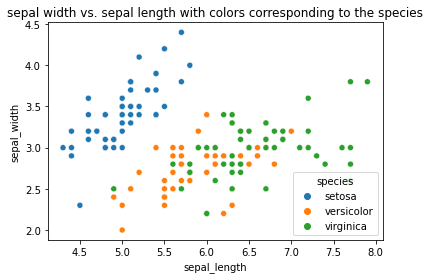

In [15]:
sns.scatterplot(data=dataset, x="sepal_length", y="sepal_width", hue="species")
plt.title('sepal width vs. sepal length with colors corresponding to the species')

### Train a k-Means model for 3 clusters and plot the results

Prepare the predictors:

In [20]:
X = dataset[['sepal_length','sepal_width']].values
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

Feature scaling:

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

K-means clustering:

In [22]:
k = 3

kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
kmeans.fit(X)

E:\Application\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [23]:
y_pred = kmeans.predict(X)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 0 2 2 2 0 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Plot the results:

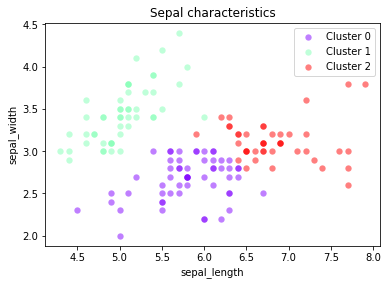

In [25]:
fig = plt.figure(figsize=(6,6))

# Prepare a list of colors
color_list = plt.cm.get_cmap('rainbow', k)
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(dataset[y_pred == i]['sepal_length'], dataset[y_pred == i]['sepal_width'], s = 40, color=color_list(i), alpha=0.5, lw=0, label='Cluster '+str(i))

    
plt.title('Sepal characteristics')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.axis('scaled')

plt.show()

### Train a Hierarchical Clustering model for 3 clusters and plot the results

**Dendograms:**

Let's first check the dendograms with different linkage methods.

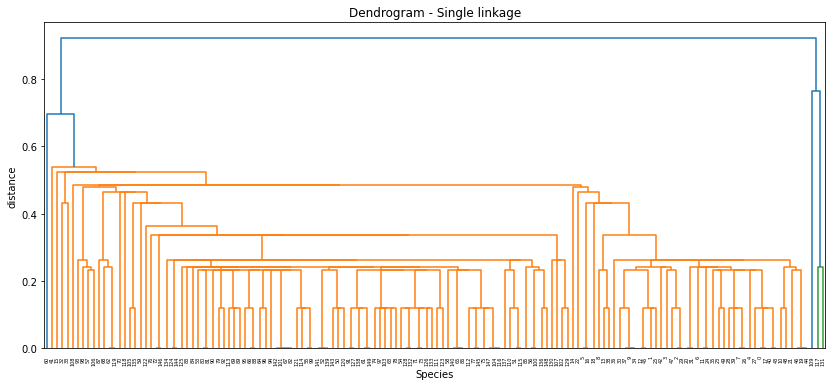

In [26]:
from scipy.cluster import hierarchy
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'single'))
plt.title('Dendrogram - Single linkage')
plt.xlabel('Species')
plt.ylabel('distance')
plt.show()

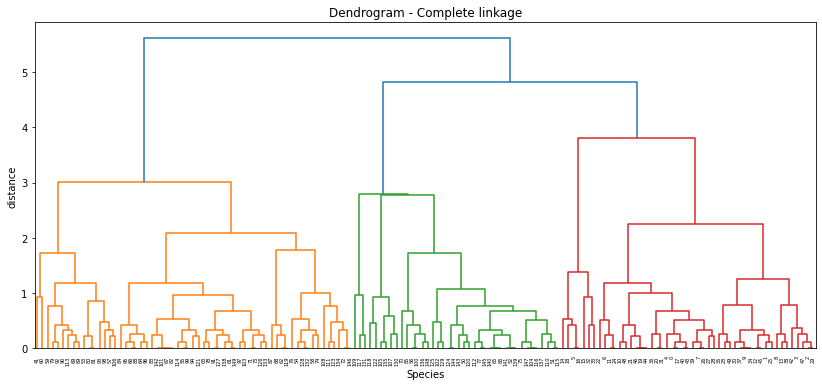

In [27]:
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'complete'))
plt.title('Dendrogram - Complete linkage')
plt.xlabel('Species')
plt.ylabel('distance')
plt.show()

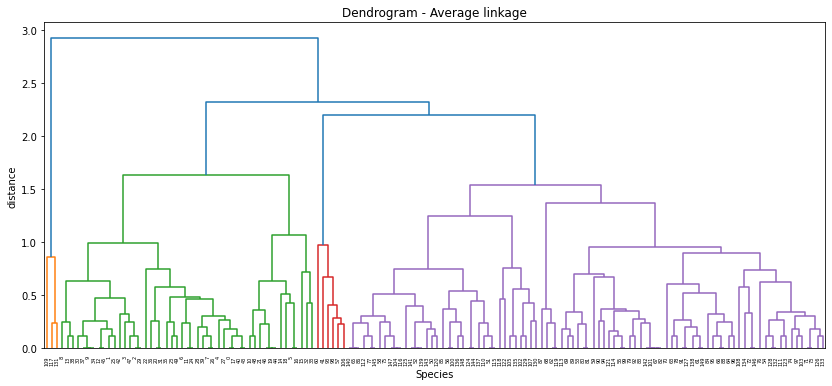

In [28]:
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'average'))
plt.title('Dendrogram - Average linkage')
plt.xlabel('Species')
plt.ylabel('distance')
plt.show()

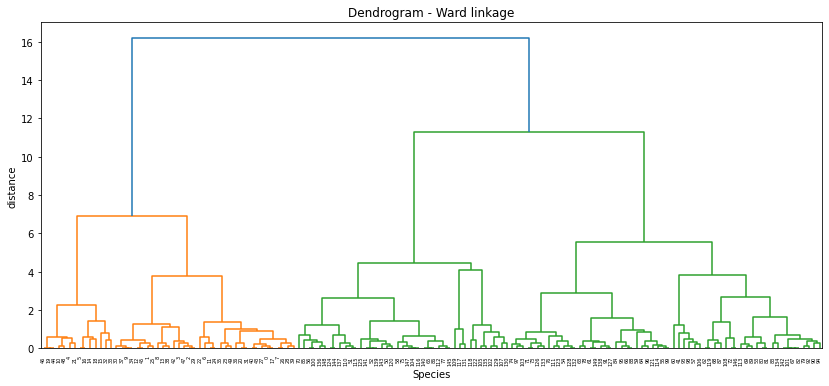

In [29]:
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))
plt.title('Dendrogram - Ward linkage')
plt.xlabel('Species')
plt.ylabel('distance')
plt.show()

Hierarchical clustering:

Let's apply the hierarchical clustering with complete and ward linkages.

In [30]:
from sklearn.cluster import AgglomerativeClustering

hc_1 = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'complete')
hc_2 = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')

Plot the results:

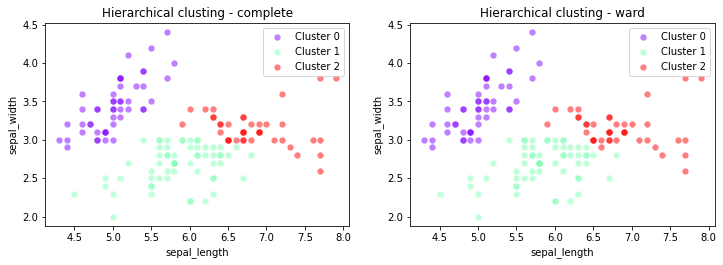

In [34]:
fig, axs = plt.subplots(1,2, figsize=(6*2,6))


feature_x = 'sepal_length'
feature_y = 'sepal_width'

# Prepare a list of colors
color_list = plt.cm.get_cmap('rainbow', k)

# Loop on each linkage method
for i_method, hc_i in enumerate([hc_1, hc_2]):
    y_pred_i = hc_i.fit_predict(X)
    linkage_i = hc_i.linkage
    
    # Plot data points with color corresponding to their cluster attribution
    for i in range(k):
        axs[i_method].scatter(dataset[y_pred_i == i][feature_x], dataset[y_pred_i == i][feature_y], s = 40, color=color_list(i), alpha=0.5, lw=0, label='Cluster '+str(i))
        axs[i_method].set_title('Hierarchical clusting - ' + linkage_i)
        axs[i_method].set_xlabel(feature_x)
        axs[i_method].set_ylabel(feature_y)
        axs[i_method].legend()
        axs[i_method].axis('scaled')
    
plt.show()

### Do again the first three steps now with petal width vs. petal length

In [36]:
# Define feature 1 and feature 2
feature_x = 'petal_length'
feature_y = 'petal_width'

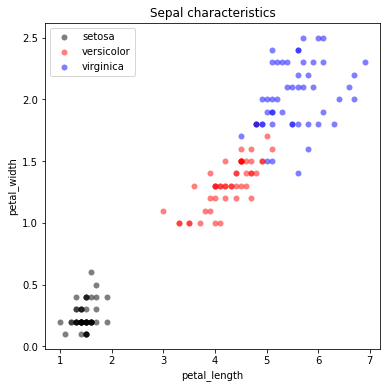

In [37]:
fig = plt.figure(figsize=(6,6))
       
# Loop on the species
for i, species in enumerate(dataset['species'].unique()):
    # Plot feature 1 vs. feature 2
    plt.scatter(dataset[dataset['species']==species][feature_x], dataset[dataset['species']==species][feature_y], color = ['black', 'red', 'blue'][i], alpha=0.5, lw=0, label = species)

# Figure style
plt.title('Sepal characteristics')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
# plt.axis('scaled')

plt.show()

Prepare the predictors:

In [38]:
X = dataset[[feature_x, feature_y]]
X.sample(n=6)

,petal_length,petal_width
43,1.6,0.6
10,1.5,0.2
12,1.4,0.1
146,5.0,1.9
107,6.3,1.8
46,1.6,0.2


Feature scaling:

In [39]:
sc = StandardScaler()
X = sc.fit_transform(X)

K-mean clustering:

In [40]:
k = 3

kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
kmeans.fit(X)

E:\Application\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [41]:
y_pred = kmeans.predict(X)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


Plot the results:

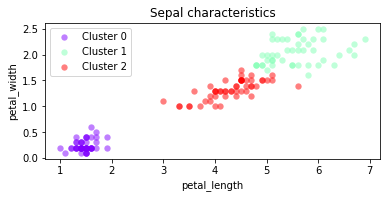

In [42]:
fig = plt.figure(figsize=(6,6))

# Prepare a list of colors
color_list = plt.cm.get_cmap('rainbow', k)
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(dataset[y_pred == i][feature_x], dataset[y_pred == i][feature_y], s = 40, color=color_list(i), alpha=0.5, lw=0, label='Cluster '+str(i))

    
plt.title('Sepal characteristics')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.axis('scaled')

plt.show()

## Train a Hierarchical Clustering model for 3 clusters and plot the results

**Dendograms:**

Let's first check the dendograms with different linkage methods.

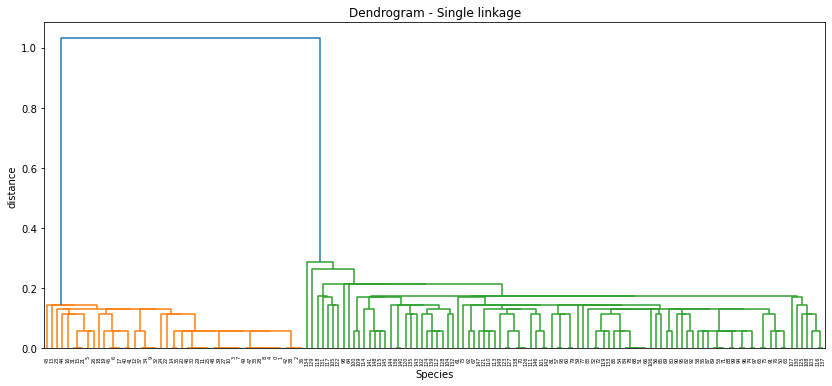

In [43]:
from scipy.cluster import hierarchy
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'single'))
plt.title('Dendrogram - Single linkage')
plt.xlabel('Species')
plt.ylabel('distance')
plt.show()

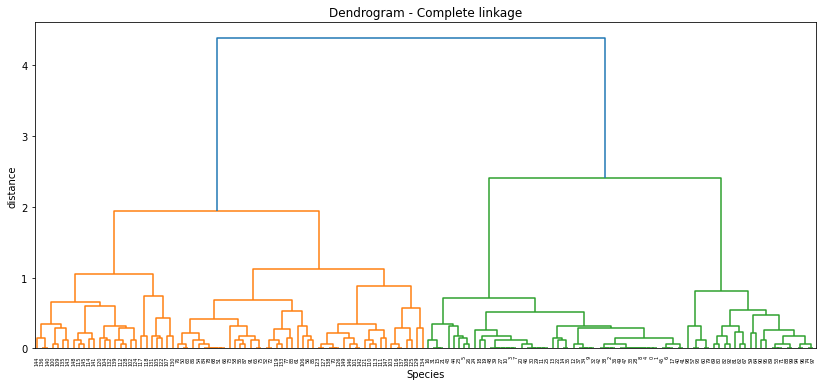

In [44]:
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'complete'))
plt.title('Dendrogram - Complete linkage')
plt.xlabel('Species')
plt.ylabel('distance')
plt.show()

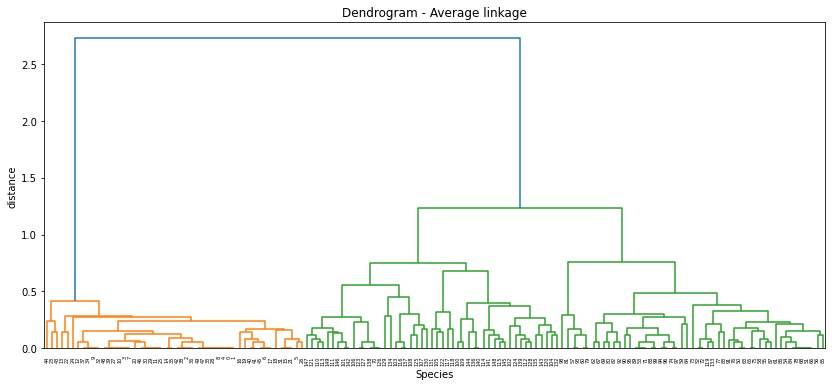

In [45]:
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'average'))
plt.title('Dendrogram - Average linkage')
plt.xlabel('Species')
plt.ylabel('distance')
plt.show()

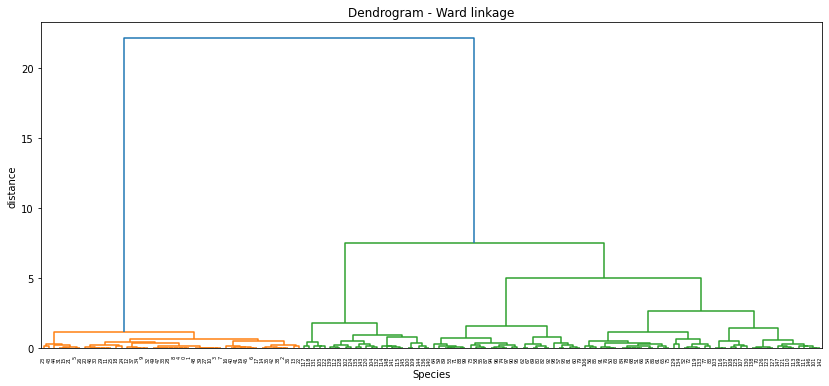

In [46]:
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))
plt.title('Dendrogram - Ward linkage')
plt.xlabel('Species')
plt.ylabel('distance')
plt.show()

##### Hierarchical clustering:

Ward and Average linkages seem the best. Potentially also Complete linkage.
Let's apply all three linkages to see.

In [48]:
from sklearn.cluster import AgglomerativeClustering

hc_1 = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'average')
hc_2 = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
hc_3 = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'complete')

Plot the results:

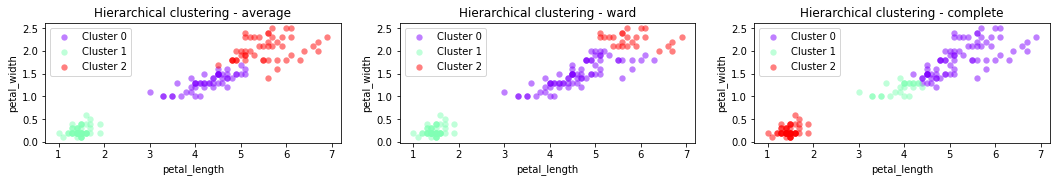

In [49]:
fig, axs = plt.subplots(1,3, figsize=(6*3,6))

# Prepare a list of colors
color_list = plt.cm.get_cmap('rainbow', k)

# Loop on each linkage method
for i_method, hc_i in enumerate([hc_1, hc_2, hc_3]):
    y_pred_i = hc_i.fit_predict(X)
    linkage_i = hc_i.linkage
    
    # Plot data points with color corresponding to their cluster attribution
    for i in range(k):
        axs[i_method].scatter(dataset[y_pred_i == i][feature_x], dataset[y_pred_i == i][feature_y], s = 40, color=color_list(i), alpha=0.5, lw=0, label='Cluster '+str(i))
        axs[i_method].set_title('Hierarchical clustering - ' + linkage_i)
        axs[i_method].set_xlabel(feature_x)
        axs[i_method].set_ylabel(feature_y)
        axs[i_method].legend()
        axs[i_method].axis('scaled')
    
plt.show()

Here, average linkage gives clusters that are the closest to the real categories.

### Visually, which 2D plane seems to be the most convenient for clustering?

Visually, the plane sepal_length/sepal_width is more subject to class interlacing whereas the plane petal_length/petal_width offers more class separation. This latter plane has shown to give better results for computing a clustering that reflect the real iris species.

### Extension: Clustering in 4 dimensions

In [50]:
X = dataset.drop('species', axis=1)
X.sample(n=6)

,sepal_length,sepal_width,petal_length,petal_width
25,5.0,3.0,1.6,0.2
3,4.6,3.1,1.5,0.2
114,5.8,2.8,5.1,2.4
141,6.9,3.1,5.1,2.3
0,5.1,3.5,1.4,0.2
74,6.4,2.9,4.3,1.3


In [51]:
sc = StandardScaler()
X = sc.fit_transform(X)

Train KMEANS

In [52]:
k = 3

kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

E:\Application\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [53]:
# Define feature 1 and feature 2 (for the visualization only)
feature_x = 'sepal_length'
feature_y = 'sepal_width'
# feature_x = 'petal_length'
# feature_y = 'petal_width'

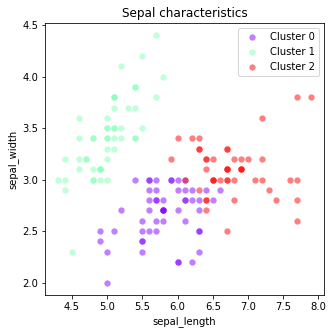

In [54]:
fig = plt.figure(figsize=(5,5))

# Prepare a list of colors
color_list = plt.cm.get_cmap('rainbow', k)
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(dataset[y_pred == i][feature_x], dataset[y_pred == i][feature_y], s = 40, color=color_list(i), alpha=0.5, lw=0, label='Cluster '+str(i))

    
plt.title('Sepal characteristics')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.show()